# Tensor Flow Neural Network Regression

### Whats covered
* Architecture of a neural network regression model
* Input shapes and output shapes (features and labels)
* Creating custom data to view and fit
* Steps in modelling
* Evaulation methods
* Saving and loading models

In [126]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

print(tf.__version__)


2.12.0


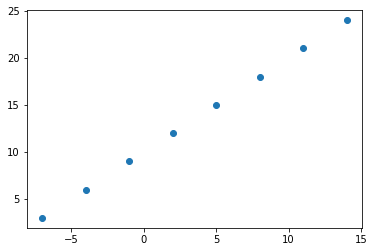

In [127]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X = tf.constant(X, dtype = tf.float64, shape = (8,1))  # shape representing (#of samples, #of Features)
# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0 , 18.0, 21.0, 24.0])
Y = tf.constant(Y, dtype = tf.float64)

# Visualize relationship
plt.scatter(X, Y)

###  Input and output shapes

In [128]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

In [129]:
X.shape, Y.shape

(TensorShape([8, 1]), TensorShape([8]))

### Steps in modeling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model. 
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is)
3. Fitting a model - letting the model try to find patterns 

In [130]:
# Set random seed
tf.random.set_seed(13)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 becuase we use 1 number to predict 1 numba
])


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,  #Mean absolute error
              optimizer = tf.keras.optimizers.SGD(),  # sgd is short for (Stochastic Gradient Descent)
              metrics = ["mae"])

# 3. Evaluate the loss
model.fit(tf.expand_dims(X, axis=1), Y, epochs = 10)


Epoch 1/10
1/1 [==============================] - 0s 327ms/step - loss: 11.9983 - mae: 11.9983
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 11.9594 - mae: 11.9594
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 11.9206 - mae: 11.9206
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 11.8818 - mae: 11.8818
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 11.8473 - mae: 11.8473
Epoch 6/10
1/1 [==============================] - 0s 0s/step - loss: 11.8201 - mae: 11.8201
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 11.7928 - mae: 11.7928
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 11.7656 - mae: 11.7656
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 11.7384 - mae: 11.7384
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 11.7161 - mae: 11.7161


In [131]:
# Making prediction using our model

input_data = tf.reshape([17], (1, 1))

# Make predictions
predictions = model.predict([input_data])
predictions

1/1 [==============================] - 0s 61ms/step


array([[[21.46707]]], dtype=float32)

### Improving a Model
We can improve our model, by altering the steps we took to create a model

1. **Creating a model** :
    * Add more layers
    * Increase the number of hidden units (also called neurons) within each of the hidden layers
    * Change the activation function of each layer
2. **Compiling a model** :
    * Change the optimization function
    * The `Learning Rate`
3. **Fitting the model** :
    * Fit the model for more epochs
    * Give the model more data to work with


In [132]:
# Set random seed
tf.random.set_seed(13)

# Create a model (same as above)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1))
# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(X, Y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 418ms/step - loss: 14.9365 - mae: 14.9365
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 6.7022 - mae: 6.7022
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 13.8721 - mae: 13.8721
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 5.6642 - mae: 5.6642
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8926 - mae: 11.8926
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1559 - mae: 11.1559
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.5248 - mae: 6.5248
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 2.3935 - mae: 2.3935
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 3.9099 - mae: 3.9099
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 1.5064 - mae: 1.5064
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss:

In [133]:
# Making prediction using our model

# It is possible for a model to be overfitting to the input data. The loss is not representative of how effective the model is at predicting new inputs.

input_data = tf.reshape([17], (1, 1))

# Make predictions
model.predict([input_data]), model.predict([[-10]])


1/1 [==============================] - 0s 73ms/step


(array([[28.69226]], dtype=float32), array([[-0.66820395]], dtype=float32))

### Evaluating a model
It is a good idea to visualize :
* the data - what data are we working with? What does it look like?
* The training of a model - how does the model perform while it learns
* The predictions of the model - how does the prediction of a model line up against the ground truth

In [134]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
Y = X + 10

X,Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

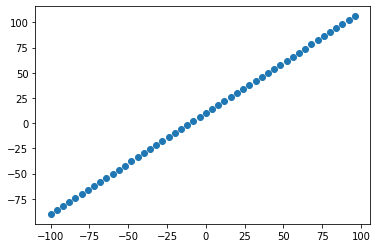

In [135]:
plt.scatter(X,Y)

### The 3 sets

* Training set: the model learns from this data, which is typically 70 to 80 percent of the data
* Validation set: The modek gets tuned on this data, which is typically 10% to 15% of the data
* Test set: The model gets evaluated on this data to test what it has learned. Typically 10% to 15%

In [136]:
# The 3 sets

X_train = X[:40]  # First 40 of the training samples
X_test = X[40:]

Y_train = Y[:40]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets

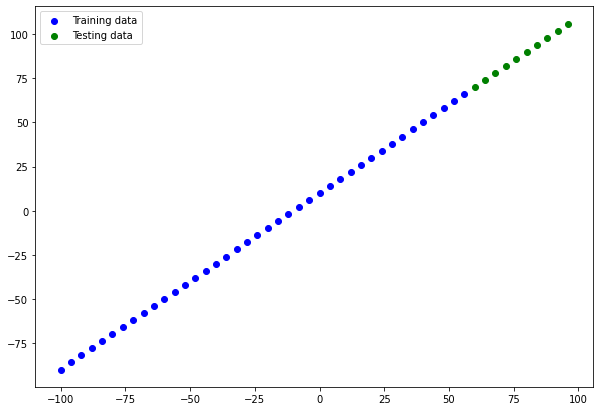

In [137]:
plt.figure(figsize=(10,7))

# Plot training data in blue

plt.scatter(X_train, Y_train, c="b", label = "Training data")

# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label = "Testing data")

# Show a legend
plt.legend();

In [138]:
# Let's have a look at how to build a neural network for our data.

# 1. Create a model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X_train, Y_train, epochs = 100)

In [139]:
# Let's create a model which builds 
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([], name = "model_1")
model.add(tf.keras.layers.Dense(10 ,input_shape = [1], name = "input_layer"))
model.add(tf.keras.layers.Dense(1, name = "output_layer"))

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

In [140]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total Params: total number of parameters in the model
* Trainable parameters: These are the parameters (patterns) the model can update as it trains. 
* Non-trainable params: parameters that are not updated during training. (this is typical when you bring in already learned patterns or parameters from other models during **Transfer Learning**)

In [141]:
# Lets fit our model to the training data
model.fit(X_train, Y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 41.2646 - mae: 41.2646
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 35.4145 - mae: 35.4145
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 29.8006 - mae: 29.8006
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 24.0281 - mae: 24.0281
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 18.4849 - mae: 18.4849
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 13.1909 - mae: 13.1909
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8908 - mae: 8.8908
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 9.3336 - mae: 9.3336
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 10.6152 - mae: 10.6152
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 11.3712 - mae: 11.3712
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - los

In [142]:
# Get a summary of our model

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


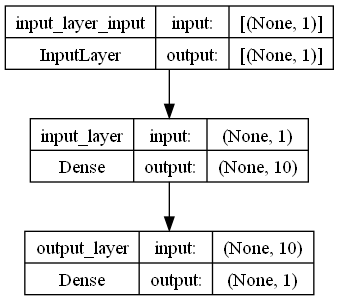

In [143]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

### Visualizing model predictions

To visualize predictions, its a good idea to plot them against the ground truth labels. 
* Y_test vs Y_pred

In [144]:
# Make predictions
Y_pred = model.predict(X_test)
Y_pred, Y_test

1/1 [==============================] - 0s 89ms/step


(array([[ 69.95088 ],
        [ 73.9316  ],
        [ 77.91233 ],
        [ 81.89307 ],
        [ 85.873795],
        [ 89.85452 ],
        [ 93.83526 ],
        [ 97.81598 ],
        [101.796715],
        [105.77744 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

1/1 [==============================] - 0s 24ms/step


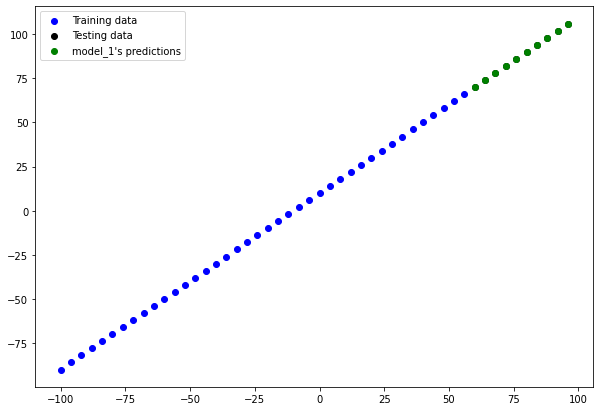

In [145]:
# Lets create a plotting function

def plot_preds(train_data = X_train,
               train_labels = Y_train,
               test_data = X_test,
               test_labels = Y_test,
               predictions = [model]):
    colors = ["r", "m", "c", "y", "g"]
    mod_num = 1
    plt.figure(figsize = (10,7))

    #Plot the training data
    plt.scatter(train_data, train_labels, c = "b", label = "Training data")

    #Plot testing Data
    plt.scatter(test_data, test_labels, c = "k", label = "Testing data")
    # Plot model's predictions in red
    for i in predictions:
        plt.scatter(test_data, i.predict(test_data), c = random.choice(colors), label = str(i.name) + "'s predictions")
        mod_num+=1
    plt.legend()

plot_preds()

### Evaluating our model's predictions with regression evaluation metrics

There will be different evaluation metrics to evaluate your model's performance

Since we're working on a regression, two of the main metrics: 
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [146]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 103ms/step - loss: 0.1358 - mae: 0.1358


[0.1358390748500824, 0.1358390748500824]

In [147]:
# Calculate the Mean Absolute Error 
tf.metrics.mean_absolute_error(Y_test, tf.constant(tf.squeeze(Y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.13584061>

In [148]:
# Caclulate the Mean Square Error 
tf.metrics.mean_squared_error(Y_test, tf.constant(tf.squeeze(Y_pred))), (Y_pred).ndim

(<tf.Tensor: shape=(), dtype=float32, numpy=0.021516299>, 2)

In [149]:
# Make MSE and MAE functions

def model_mae(actual = Y_test, predicted = Y_pred):
    if(predicted.ndim > 1):
        predicted = tf.squeeze(predicted)
    
    if(actual.ndim > 1):
        actual = tf.squeeze(actual)
    
    return tf.metrics.mean_absolute_error(actual, predicted)


def model_mse(actual = Y_test, predicted = Y_pred):
    if(predicted.ndim > 1):
        predicted = tf.squeeze(predicted)
    
    if(actual.ndim > 1):
        actual = tf.squeeze(actual)
    
    return tf.metrics.mean_squared_error(actual, predicted)

model_mae(), model_mse()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.13584061>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.021516299>)

### Running experiments to imporve our model
1. Get more data - get more examples for model to train on
2. Make model larger, (using a more complex model)
    * More layers
    * More hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

3 modelling experiments

1. `model_1` - same as original
    * 1 Layer, 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4` - Change optimizer to Adam


In [150]:
# Set random seed
tf.random.set_seed(13)

# 1. Create the model

model_1 = tf.keras.Sequential([])
model_1.add(tf.keras.Input(shape = (1,)))
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])




# 3. Fit the model
model_1.fit(X_train, Y_train, epochs = 100)


Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 53.6371 - mae: 53.6371
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 52.8174 - mae: 52.8174
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 51.9172 - mae: 51.9172
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 51.1129 - mae: 51.1129
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 50.2725 - mae: 50.2725
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 49.4453 - mae: 49.4453
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 48.6201 - mae: 48.6201
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 47.7554 - mae: 47.7554
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 46.9575 - mae: 46.9575
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 46.1430 - mae: 46.1430
Epoch 11/100
2/2 [==============================] - 0s 9ms/ste

In [151]:
# Model_1 Characteristics

model_1.input_shape, model_1.output_shape

((None, 1), (None, 1))

In [152]:
# Model 2

model_2 = tf.keras.Sequential([])
model_2.add(tf.keras.layers.Dense(50, input_shape = [1,]))
model_2.add(tf.keras.layers.Dense(1))

# Compilation

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["mae", "mse"])

# Fitting

model_2.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
2/2 [==============================] - 1s 8ms/step - loss: 46.0801 - mae: 46.0801 - mse: 2884.5989
Epoch 2/50
2/2 [==============================] - 0s 0s/step - loss: 32.6305 - mae: 32.6305 - mse: 1432.7477
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 18.2006 - mae: 18.2006 - mse: 433.4955
Epoch 4/50
2/2 [==============================] - 0s 0s/step - loss: 9.5124 - mae: 9.5124 - mse: 117.1809
Epoch 5/50
2/2 [==============================] - 0s 0s/step - loss: 12.7957 - mae: 12.7957 - mse: 190.6746
Epoch 6/50
2/2 [==============================] - 0s 0s/step - loss: 14.2593 - mae: 14.2593 - mse: 280.1520
Epoch 7/50
2/2 [==============================] - 0s 0s/step - loss: 13.7756 - mae: 13.7756 - mse: 259.5571
Epoch 8/50
2/2 [==============================] - 0s 0s/step - loss: 11.9368 - mae: 11.9368 - mse: 167.5859
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 9.5389 - mae: 9.5389 - mse: 92.6563
Epoch 10/50
2/2 [===========

In [153]:
# Evaluating Predictions


1/1 [==============================] - 0s 40ms/step


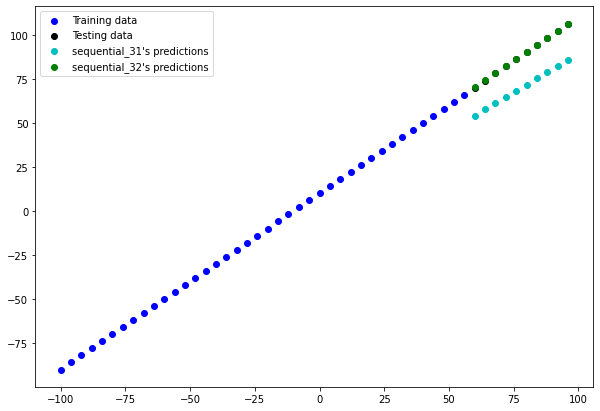

In [154]:
plot_preds(train_data = X_train,
               train_labels = Y_train,
               test_data = X_test,
               test_labels = Y_test,
               predictions = [model_1,model_2])

### Saving our models

Saving our models allows us to use them outside of their training location. 

**Two main formats we can save our models to:**
1. The SavedModel format
2. The HDF5 format

savefile includes
* The model architecture, allowing reinstantiation
* The model weights (The patterns the model already learned)
* The **state of the optimizer**, allowing to resume training exactly where you left off

HDF5 format (Hierachical Data Format):
* File type standard for models

In [155]:
# Save model using SaveModel format

model_2.save("01_bestModel_SaveModel_format")

INFO:tensorflow:Assets written to: 01_bestModel_SaveModel_format\assets


INFO:tensorflow:Assets written to: 01_bestModel_SaveModel_format\assets


In [156]:
# Save model using the HDF5 format

model_2.save("01_bestModel_HDF5_format.h5")

### Loading in a saved Model

In [157]:
# Loading in SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("C:/Users/varun/Summer 2023 Projects/TensorFlowLearning/01_bestModel_SaveModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 50)                100       
                                                                 
 dense_65 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [158]:
# Loading in HDF5 model
loaded_HDF5_model = tf.keras.models.load_model("C:/Users/varun/Summer 2023 Projects/TensorFlowLearning/01_bestModel_HDF5_format")

In [159]:
# Compare model_2 predictions with loaded model predictions

model_2_preds = model_2.predict(X_test)

loaded_SavedModel_preds = loaded_SavedModel_format.predict(X_test)
loaded_HDF5_preds = loaded_HDF5_model.predict(X_test)

model_2_preds, loaded_SavedModel_preds, model_mae(Y_test, model_2_preds) == model_mae(Y_test, loaded_SavedModel_preds),

1/1 [==============================] - 0s 48ms/step


(array([[ 70.45582 ],
        [ 74.4409  ],
        [ 78.42598 ],
        [ 82.41105 ],
        [ 86.39613 ],
        [ 90.38121 ],
        [ 94.366295],
        [ 98.35137 ],
        [102.33645 ],
        [106.321526]], dtype=float32),
 array([[ 70.45582 ],
        [ 74.4409  ],
        [ 78.42598 ],
        [ 82.41105 ],
        [ 86.39613 ],
        [ 90.38121 ],
        [ 94.366295],
        [ 98.35137 ],
        [102.33645 ],
        [106.321526]], dtype=float32),
 <tf.Tensor: shape=(), dtype=bool, numpy=True>)

## A Larger Model

In [160]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [161]:
# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [162]:
# One-hot encoding all non numerical data
insuranceOH = pd.get_dummies(insurance)
insuranceOH

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [163]:
# Create X and Y values (features and labels)
X = insuranceOH.drop("charges", axis = 1)
Y = insuranceOH["charges"]
X,Y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [164]:
# Creating training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=13)

X_train.shape # 1070 rows each with 11 cells. We are only passing one row at a time to predict one output value of shape (0,1)


(1070, 11)

In [165]:
# Build A neural network for the relationship
tf.random.set_seed(13)

# Build the model

ins_model_1 = tf.keras.Sequential([])
ins_model_1.add(tf.keras.layers.Dense(100, input_shape = [11,])) # Input shape is 11 cells from 1 row out of the 1070 rows.
ins_model_1.add(tf.keras.layers.Dense(10, input_shape = [11,])) # Input shape is 11 cells from 1 row out of the 1070 rows.
ins_model_1.add(tf.keras.layers.Dense(1))


# Compile

ins_model_1.compile(loss = tf.keras.losses.mae, 
                    optimizer = tf.keras.optimizers.Adam(0.01),
                    metrics= ["mae", "mse"])


# Build

history = ins_model_1.fit(X_train, Y_train, epochs = 200)


Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 11637.7578 - mae: 11637.7578 - mse: 280282784.0000
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 7700.4673 - mae: 7700.4673 - mse: 155949264.0000
Epoch 3/200
34/34 [==============================] - 0s 947us/step - loss: 7414.0952 - mae: 7414.0952 - mse: 153918016.0000
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7200.8096 - mae: 7200.8096 - mse: 154533840.0000
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6924.8711 - mae: 6924.8711 - mse: 158792640.0000
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6631.7070 - mae: 6631.7070 - mse: 157706544.0000
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 6476.3423 - mae: 6476.3423 - mse: 155312432.0000
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 6332.7808 - mae: 6332.7808 - mse: 149888336.0000
Epoch 9/200
34/34 [=

In [166]:
# Evaluating the model 

ins_model_1.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2940.1482 - mae: 2940.1482 - mse: 39287216.0000


[2940.148193359375, 2940.148193359375, 39287216.0]

Text(0, 0.5, 'loss')

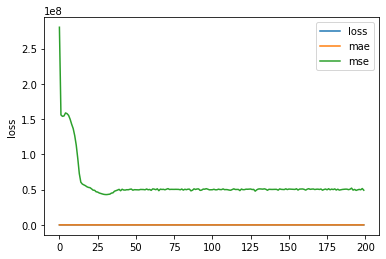

In [167]:
# Plot history (also known as a loss cure or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")

**When to stop training (early stopping callback)**
* When there is no decrease in loss in 10 or more epochs

### Preprocessing data (Normalization and standardization)

Normalization (Scale features): Changes the numeric columns in the dataset to a common scale without distorting differences in the common values. 

Standardization: Removes the mean and divides each value by the standard deviation. 
* Reduces the effects of outliers


In terms of scaling values, neural networks tend to **prefer** normalization. 

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

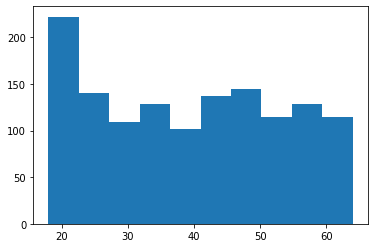

In [172]:
plt.hist(X["age"])

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn


In [192]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))


# Create X and Y
X = insurance.drop("charges", axis = 1)
Y = insurance["charges"]


# Build our train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 13)


# Fit the column transformer to our training data ONLY
ct.fit(X_train)

# Transform training and test data with normlization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train) # Produces a non-pandas numpy array without any column labels. # of columns increased because of one hot encode
X_test_normal = ct.transform(X_test)

In [259]:
# Build neural network with new normalized data
tf.random.set_seed(13)

ins_model_2 = tf.keras.Sequential([])
ins_model_2.add(tf.keras.layers.Dense(100))
ins_model_2.add(tf.keras.layers.Dense(10))
ins_model_2.add(tf.keras.layers.Dense(1))


# Compile the model

ins_model_2.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                    metrics = ["mae"])


# Fit model
ins_model_2.fit(X_train_normal, Y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13355.8232 - mae: 13355.8223
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11565.7822 - mae: 11565.7822
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 8429.3467 - mae: 8429.3467
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7721.9595 - mae: 7721.9595
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7237.0825 - mae: 7237.0825
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6622.9258 - mae: 6622.9258
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 5711.7368 - mae: 5711.7368
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 4542.7300 - mae: 4542.7300
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 3856.4146 - mae: 3856.4146
Epoch 10/100
34/34 [==============================] - 0s 980us/step - loss: 3776.2554 - mae: 377